In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

files = {
    2021: "../data/cleaned_data/atl311_2021_merged_with_geocodes.csv",
    2022: "../data/cleaned_data/atl311_2022_merged_with_geocodes.csv",
    2023: "../data/cleaned_data/atl311_2023_merged_with_geocodes.csv",
    2024: "../data/cleaned_data/atl311_2024_merged_with_geocodes.csv",
    2025: "../data/cleaned_data/atl311_2025_merged_with_geocodes.csv",
}


In [2]:
dfs = []

for year, path in files.items():
    df = pd.read_csv(
        path,
        parse_dates=["Opened", "Closed Date 1", "Closed Date 2", "closed"],
        low_memory=False
    )

    print(f"{year}: raw rows = {len(df):,}")

    # Keep only valid geocodes
    df = df[
        df["ok"]
        .astype(str)
        .str.strip()
        .str.lower()
        .isin(["true", "1", "yes"])
    ]

    df = df[
        df["lat"].between(33.60, 33.90) &
        df["lng"].between(-84.55, -84.25)
    ].copy()

    # Add year for temporal analysis
    df["year"] = year

    print(f"{year}: after filter = {len(df):,}")

    dfs.append(df)


2021: raw rows = 104,884
2021: after filter = 101,777


C:\Users\shrey\AppData\Local\Temp\ipykernel_27152\551305398.py:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(
C:\Users\shrey\AppData\Local\Temp\ipykernel_27152\551305398.py:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(
C:\Users\shrey\AppData\Local\Temp\ipykernel_27152\551305398.py:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(


2022: raw rows = 52,507
2022: after filter = 51,168


C:\Users\shrey\AppData\Local\Temp\ipykernel_27152\551305398.py:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(


2023: raw rows = 100,843
2023: after filter = 97,460


C:\Users\shrey\AppData\Local\Temp\ipykernel_27152\551305398.py:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(


2024: raw rows = 98,965
2024: after filter = 95,899
2025: raw rows = 100,257
2025: after filter = 97,004


In [3]:
df_all = pd.concat(dfs, ignore_index=True)
print(f"\nTotal rows (2021–2025): {len(df_all):,}")
df_all["year"].value_counts().sort_index()
df_all[["lat", "lng"]].describe()
df_all.head()


Total rows (2021–2025): 443,308


Opened                                        Description  \
0  2021-03-02 13:30:00  Information on How to Request an Account Adjus...   
1  2021-03-03 13:30:00  Information on How to Dispute Your Water and S...   
2  2021-03-03 13:30:00  Information on How to Dispute Your Water and S...   
3  2021-03-09 13:30:00  Street Light Bulb Replacement or Street Light ...   
4  2021-03-11 13:30:00  Right of Way Maintenance Visibility/Overgrowth...   

                                Address Zip Code        Closed Date 1  \
0     4501 Dudley LN NW, Atlanta, 30327    30327  2021-09-13 11:28:56   
1     238 peachtree cir, ATLANTA, 30309    30309  2021-07-15 12:54:21   
2  3434 Habersham Rd NW, Atlanta, 30305    30305  2022-05-26 09:54:34   
3   1160 Veltrie Circle, ATLANTA, 30311    30311  2021-04-14 15:24:37   
4     2855 elliott cir , ATLANTA, 30305    30305                  NaT   

        Closed Date 2    Status     Number               closed  \
0                 NaT  Resolved  CS0063095  2021-09-13 11:28:56   
1                 NaT  Resolved  CS0060088  2021-07-15 12:54:21   
2                 NaT  Resolved  CS0026984  2022-05-26 09:54:34   
3                 NaT  Resolved  CS0001758  2021-04-14 15:24:37   
4 2025-06-03 17:47:00  Resolved  CS0056768  2025-06-03 17:47:00   

   resolution_time_hours  has_closure_time  zip_clean  zip_int  \
0            4677.982222              True      30327  30327.0   
1            3215.405833              True      30309  30309.0   
2           10772.409444              True      30305  30305.0   
3             865.910278              True      30311  30311.0   
4           37084.283333              True      30305  30305.0   

                           address_norm        lat        lng    ok  year  \
0     4501 Dudley LN NW, Atlanta, 30327  33.877556 -84.388201  True  2021   
1     238 peachtree cir, ATLANTA, 30309  33.795376 -84.386323  True  2021   
2  3434 Habersham Rd NW, Atlanta, 30305  33.848637 -84.390632  True  2021   
3   1160 Veltrie Circle, ATLANTA, 30311  33.723403 -84.475014  True  2021   
4      2855 elliott cir, ATLANTA, 30305  33.833415 -84.367372  True  2021   

  Short Description  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [4]:
print(df_all["year"].value_counts().sort_index())


year
2021    101777
2022     51168
2023     97460
2024     95899
2025     97004
Name: count, dtype: int64


In [6]:
df_all.to_csv("../data/geocoded_data/merged_2021_2025.csv", index=False)

In [ ]:

# gdf = gpd.GeoDataFrame(
#     df,
#     geometry=gpd.points_from_xy(df["lng"], df["lat"]),
#     crs="EPSG:4326"
# ).to_crs(epsg=3857)

# fig, ax = plt.subplots(figsize=(8, 8))

# gdf.plot(
#     ax=ax,
#     markersize=1,
#     alpha=0.25
# )

# ctx.add_basemap(
#     ax,
#     source=ctx.providers.CartoDB.Positron,
#     zoom=12 
# )

# ax.set_title("Atlanta 311 Resolved Requests for year 2021 - 2025")
# ax.axis("off")
# plt.show()

In [ ]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["lng"], df["lat"]),
    crs="EPSG:4326"
).to_crs(epsg=3857)

gdf["x"] = gdf.geometry.x
gdf["y"] = gdf.geometry.y


In [ ]:
# # Categorize response speed
# gdf["response_class"] = pd.cut(
#     gdf["resolution_time_hours"],
#     bins=[0, 72, 168, 10_000],
#     labels=["Fast (≤3d)", "Medium (3–7d)", "Slow (>7d)"]
# )

# fig, ax = plt.subplots(figsize=(8, 8))

# gdf.plot(
#     column="response_class",
#     ax=ax,
#     markersize=2,
#     legend=True
# )

# ctx.add_basemap(
#     ax,
#     source=ctx.providers.CartoDB.Positron,
#     zoom=12
# )

# ax.set_title("Atlanta 311 Response Speed" \
# "")
# ax.axis("off")
# plt.show()


In [ ]:
gdf["response_class"] = pd.cut(
    gdf["resolution_time_hours"],
    bins=[0, 72, 168, 10_000],
    labels=["Fast (≤3d)", "Medium (3–7d)", "Slow (>7d)"]
)

response_score_map = {
    "Fast (≤3d)": 0.0,
    "Medium (3–7d)": 0.5,
    "Slow (>7d)": 1.0
}

gdf["response_score"] = (
    gdf["response_class"]
    .map(response_score_map)
    .astype(float)
)


In [ ]:
gdf["response_score"].describe()


In [ ]:
# grid = (
#     gdf
#     .groupby([pd.cut(gdf["x"], 50), pd.cut(gdf["y"], 50)])
#     .agg(
#         request_count=("resolution_time_hours", "count"),

#         sla_violation_rate=(
#             "resolution_time_hours",
#             lambda x: (x > 168).mean()
#         ),

#         sla_met_rate=(
#             "resolution_time_hours",
#             lambda x: (x <= 168).mean()
#         ),
#         response_time_score=("response_score", "mean")

#     )
#     .reset_index()
# )


In [ ]:
grid = (
    gdf
    .groupby(
        [
            "year",                     
            pd.cut(gdf["x"], 50),
            pd.cut(gdf["y"], 50)
        ],
        observed=True                  
    )
    .agg(
        request_count=("resolution_time_hours", "count"),

        sla_violation_rate=(
            "resolution_time_hours",
            lambda x: (x > 168).mean()
        ),

        response_time_score=("response_score", "mean")
    )
    .reset_index()
)


In [ ]:
# Use bin midpoints as cell centers
x_bin_col = grid.columns[1]
y_bin_col = grid.columns[2]

grid["x_mid"] = grid[x_bin_col].apply(lambda b: b.mid)
grid["y_mid"] = grid[y_bin_col].apply(lambda b: b.mid)

grid_gdf = gpd.GeoDataFrame(
    grid,
    geometry=gpd.points_from_xy(grid["x_mid"], grid["y_mid"]),
    crs="EPSG:3857"
)


In [ ]:
grid_gdf.head()


In [ ]:
# # Normalize request counts
# grid_gdf["norm_service_burden"] = (
#     grid_gdf["request_count"] / grid_gdf["request_count"].max()
# )

# # Quick sanity check
# grid_gdf["norm_service_burden"].describe()


In [ ]:
grid_gdf["norm_service_burden"] = (
    grid_gdf
    .groupby("year")["request_count"]
    .transform(lambda x: x / x.max())
)


In [ ]:
grid_gdf["year"].value_counts()


In [ ]:
grid_gdf.groupby("year")["norm_service_burden"].max()


In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

grid_gdf.plot(
    column="norm_service_burden",
    ax=ax,
    markersize=grid_gdf["request_count"] / 4,
    legend=True,
    alpha=0.9
)

ctx.add_basemap(
    ax,
    source=ctx.providers.CartoDB.Positron,
    zoom=12
)

ax.set_title("Atlanta 311 – Normalized Service Burden (Resolved Requests)")
ax.axis("off")
plt.show()


In [ ]:
##### For yearly trend

grid = (
    gdf
    .groupby([
        "year",
        pd.cut(gdf["x"], 50),
        pd.cut(gdf["y"], 50)
    ])
    .agg(
        request_count=("resolution_time_hours", "count"),
        response_time_score=("response_score", "mean")
    )
    .reset_index()
)


In [ ]:
grid["norm_service_burden"] = (
    grid
    .groupby("year")["request_count"]
    .transform(lambda x: x / x.max())
)


In [ ]:
yearly_trend = (
    grid
    .groupby("year")
    .agg(
        mean_burden=("norm_service_burden", "mean"),
        median_burden=("norm_service_burden", "median"),
        max_burden=("norm_service_burden", "max"),
        total_requests=("request_count", "sum")
    )
    .reset_index()
)


In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(
    yearly_trend["year"],
    yearly_trend["mean_burden"],
    marker="o",
    linewidth=2,
    label="Mean Normalized Burden"
)

ax.set_xlabel("Year")
ax.set_ylabel("Normalized Service Burden")
ax.set_title("Year-wise Trend of Normalized Service Burden (Atlanta 311)")
ax.grid(alpha=0.3)
ax.legend()

plt.show()


In [ ]:
df_all["year"].value_counts().sort_index()


In [ ]:
print(yearly_trend["year"].value_counts())


In [5]:
gdf = gpd.GeoDataFrame(
    df_all,
    geometry=gpd.points_from_xy(df_all["lng"], df_all["lat"]),
    crs="EPSG:4326"
).to_crs(epsg=3857)

gdf["x"] = gdf.geometry.x
gdf["y"] = gdf.geometry.y


In [6]:
gdf["response_score"] = np.select(
    [
        gdf["resolution_time_hours"] <= 72,
        gdf["resolution_time_hours"].between(72, 168),
        gdf["resolution_time_hours"] > 168
    ],
    [10, 5, 1],
    default=np.nan
)


In [8]:
gdf["year"].value_counts().sort_index()


year
2021    101777
2022     51168
2023     97460
2024     95899
2025     97004
Name: count, dtype: int64

In [9]:
grid = (
    gdf
    .groupby(
        [
            "year",
            pd.cut(gdf["x"], 50),
            pd.cut(gdf["y"], 50)
        ],
        observed=True
    )
    .agg(
        request_count=("resolution_time_hours", "count"),
        response_time_score=("response_score", "mean")
    )
    .reset_index()
)


In [10]:
grid.columns = [
    "year",
    "x_bin",
    "y_bin",
    "request_count",
    "response_time_score"
]


In [11]:
grid["x_mid"] = grid["x_bin"].apply(lambda b: b.mid)
grid["y_mid"] = grid["y_bin"].apply(lambda b: b.mid)


In [12]:
grid_gdf = gpd.GeoDataFrame(
    grid,
    geometry=gpd.points_from_xy(grid["x_mid"], grid["y_mid"]),
    crs="EPSG:3857"
)


In [13]:
grid_gdf["norm_service_burden"] = (
    grid_gdf
    .groupby("year")["request_count"]
    .transform(lambda x: x / x.max())
)


In [14]:
# All years present?
print(grid_gdf["year"].value_counts().sort_index())

# Normalization correct?
print(
    grid_gdf
    .groupby("year")["norm_service_burden"]
    .max()
)


year
2021    1177
2022    1168
2023    1401
2024    1385
2025    1386
Name: count, dtype: int64
year
2021    1.0
2022    1.0
2023    1.0
2024    1.0
2025    1.0
Name: norm_service_burden, dtype: float64


In [15]:
print(grid_gdf.columns)

Index(['year', 'x_bin', 'y_bin', 'request_count', 'response_time_score',
       'x_mid', 'y_mid', 'geometry', 'norm_service_burden'],
      dtype='object')


In [16]:
grid_gdf_backup = grid_gdf.copy(deep=True)


In [17]:
grid_gdf_backup.shape
grid_gdf_backup.columns
grid_gdf_backup.crs


<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

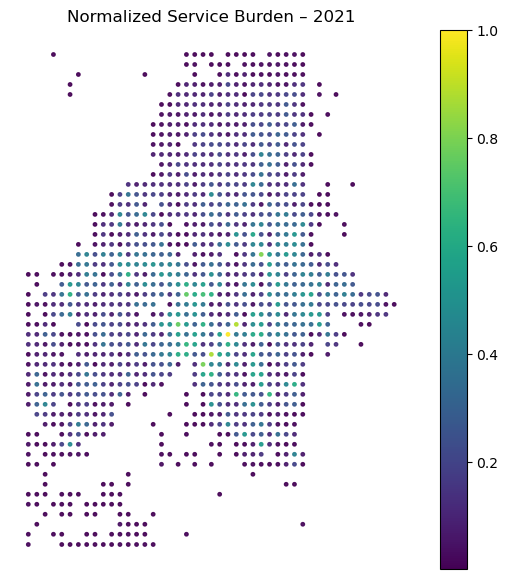

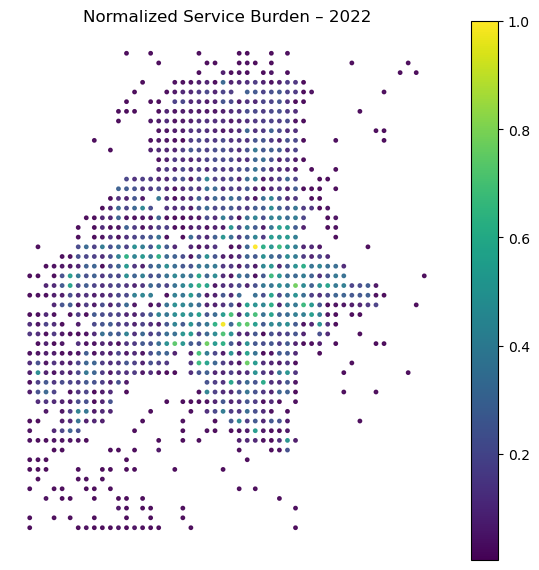

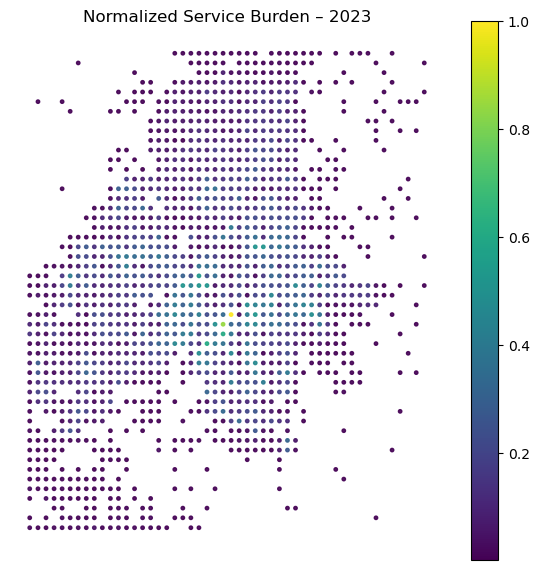

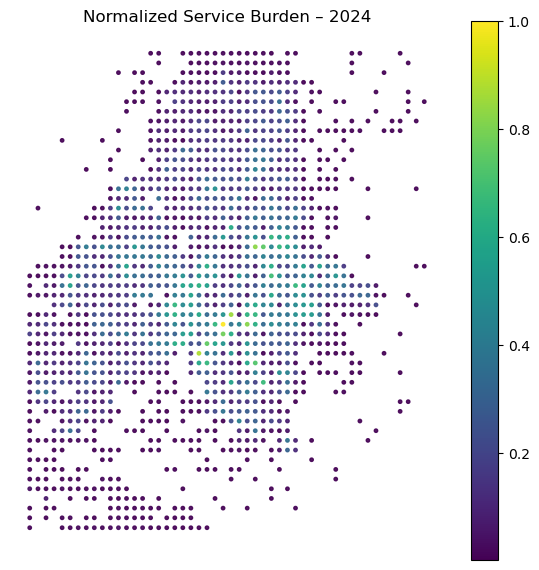

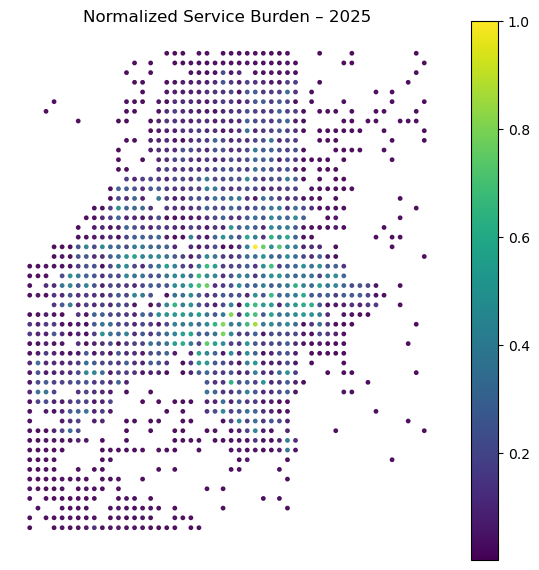

In [18]:
import matplotlib.pyplot as plt

years = sorted(grid_gdf["year"].unique())

for y in years:
    fig, ax = plt.subplots(figsize=(7, 7))

    grid_gdf[grid_gdf["year"] == y].plot(
        column="norm_service_burden",
        ax=ax,
        cmap="viridis",
        markersize=6,
        legend=True,
        alpha=0.9
    )

    ax.set_title(f"Normalized Service Burden – {y}")
    ax.axis("off")

    plt.show()


In [21]:
top10_per_year = (
    grid_gdf
    .sort_values(["year", "norm_service_burden"], ascending=[True, False])
    .groupby("year")
    .head(10)
)

top10_per_year[
    ["year", "norm_service_burden", "request_count"]
].head(5)


year  norm_service_burden  request_count
683  2021             1.000000            516
724  2021             0.883721            456
602  2021             0.874031            451
857  2021             0.806202            416
563  2021             0.792636            409

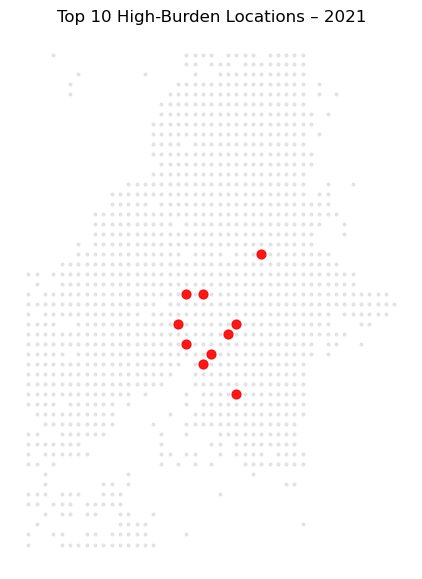

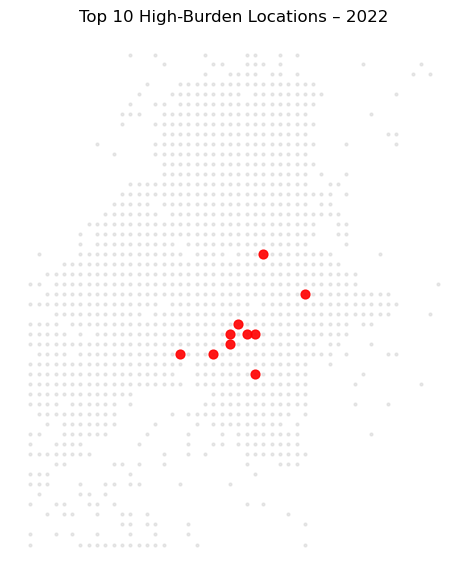

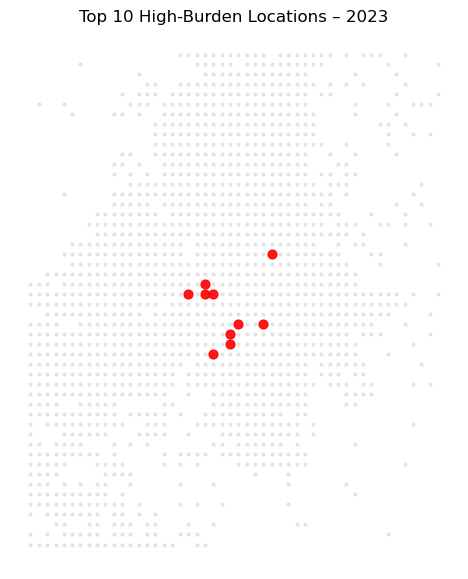

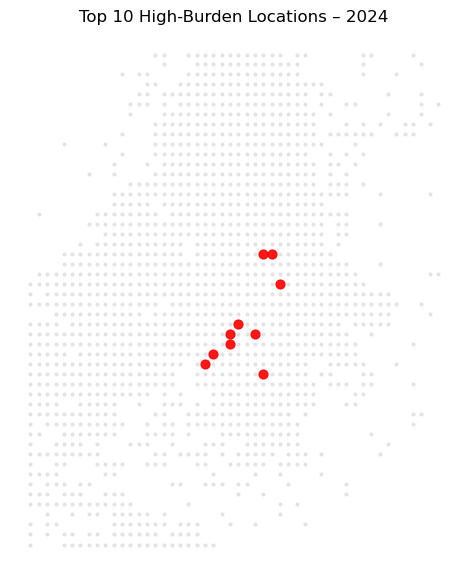

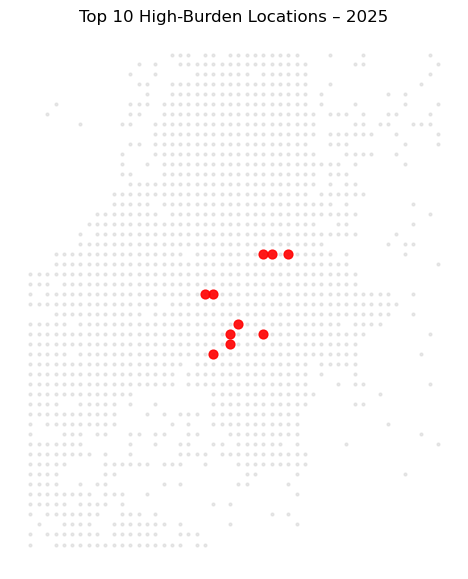

In [22]:
for y in years:
    fig, ax = plt.subplots(figsize=(7, 7))

    yearly = grid_gdf[grid_gdf["year"] == y]
    top10 = top10_per_year[top10_per_year["year"] == y]

    # Base grid (light)
    yearly.plot(
        ax=ax,
        color="lightgrey",
        markersize=4,
        alpha=0.5
    )

    # Top 10 (highlight)
    top10.plot(
        ax=ax,
        color="red",
        markersize=40,
        alpha=0.9
    )

    ax.set_title(f"Top 10 High-Burden Locations – {y}")
    ax.axis("off")

    plt.show()


In [23]:
top10_per_year["grid_id"] = (
    top10_per_year.geometry.x.round(0).astype(str) + "_" +
    top10_per_year.geometry.y.round(0).astype(str)
)

top10_per_year.groupby("grid_id")["year"].nunique().sort_values(ascending=False)


grid_id
-9397036.0_3990886.0    5
-9395033.0_3993295.0    5
-9395700.0_3992492.0    5
-9393029.0_3998917.0    4
-9395700.0_3991689.0    4
-9392361.0_3998917.0    3
-9397704.0_3995705.0    3
-9393697.0_3992492.0    2
-9399040.0_3995705.0    2
-9397704.0_3990083.0    2
-9397036.0_3995705.0    2
-9393029.0_3992492.0    1
-9389690.0_3995705.0    1
-9391026.0_3998917.0    1
-9393029.0_3989280.0    1
-9391693.0_3996508.0    1
-9393029.0_3993295.0    1
-9394365.0_3992492.0    1
-9395033.0_3987674.0    1
-9393697.0_3989280.0    1
-9397704.0_3996508.0    1
-9399040.0_3991689.0    1
-9399707.0_3990886.0    1
-9399707.0_3993295.0    1
Name: year, dtype: int64

In [25]:
plot_df = grid_gdf.copy(deep=True)


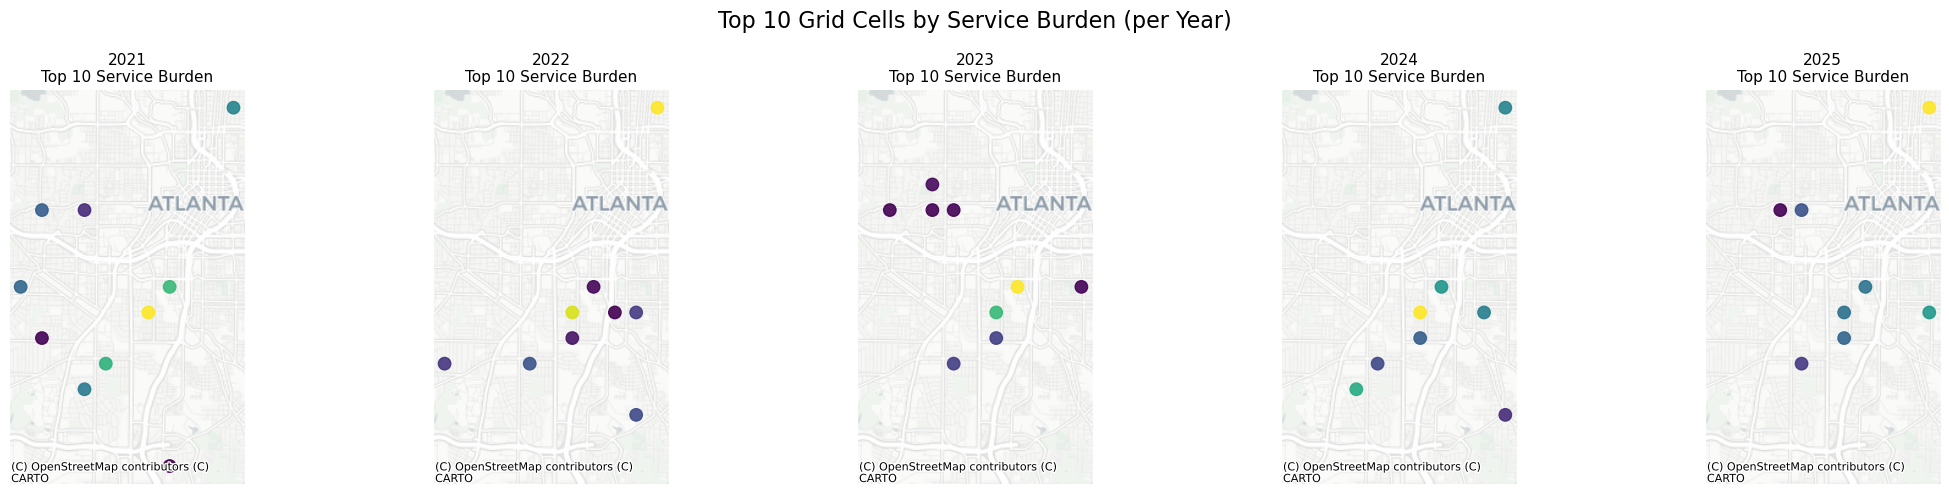

In [26]:
import matplotlib.pyplot as plt
import contextily as ctx

years = sorted(plot_df["year"].unique())

fig, axes = plt.subplots(1, len(years), figsize=(22, 5), sharex=True, sharey=True)

for ax, yr in zip(axes, years):
    top10 = (
        plot_df[plot_df["year"] == yr]
        .nlargest(10, "request_count")
    )

    top10.plot(
        ax=ax,
        column="request_count",
        markersize=80,
        legend=False,
        alpha=0.9
    )

    ctx.add_basemap(
        ax,
        source=ctx.providers.CartoDB.Positron,
        zoom=12
    )

    ax.set_title(f"{yr}\nTop 10 Service Burden", fontsize=11)
    ax.axis("off")

plt.suptitle("Top 10 Grid Cells by Service Burden (per Year)", fontsize=16)
plt.tight_layout()
plt.show()


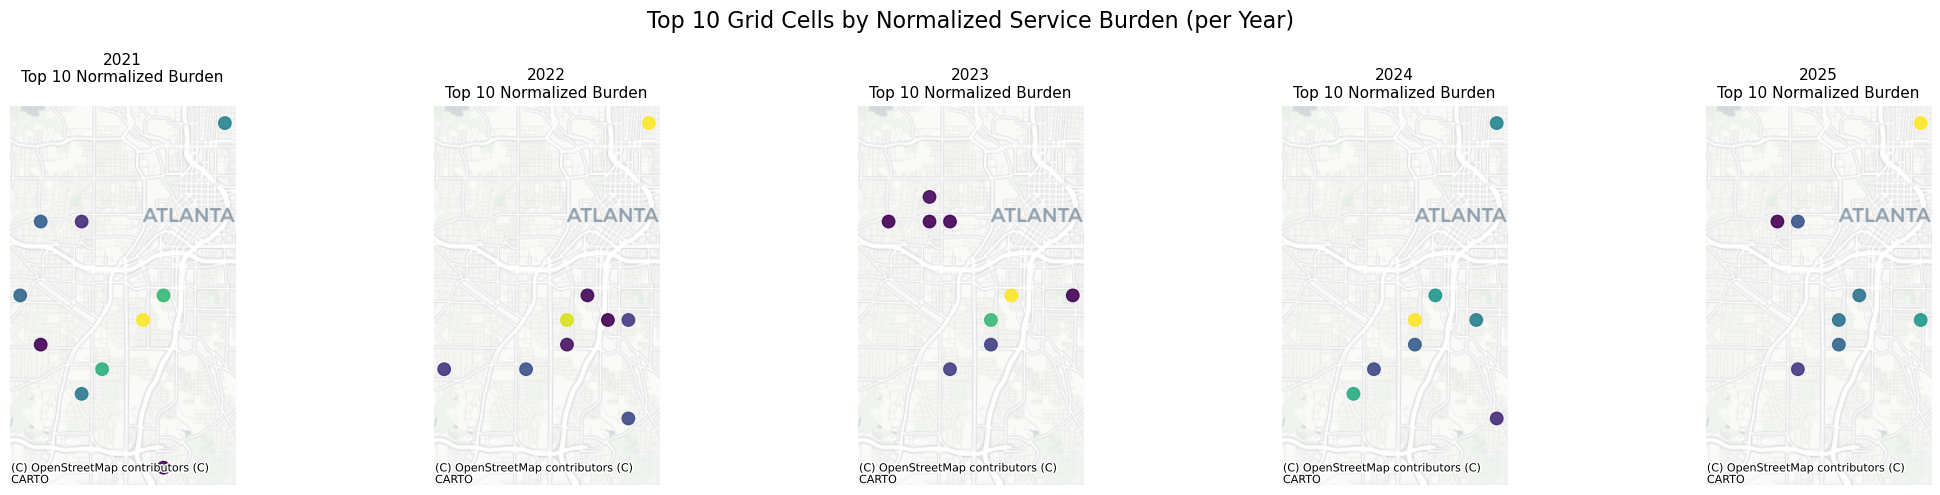

In [27]:
fig, axes = plt.subplots(1, len(years), figsize=(22, 5), sharex=True, sharey=True)

for ax, yr in zip(axes, years):
    top10 = (
        plot_df[plot_df["year"] == yr]
        .nlargest(10, "norm_service_burden")
    )

    top10.plot(
        ax=ax,
        column="norm_service_burden",
        markersize=80,
        legend=False,
        alpha=0.9,
        cmap="viridis"
    )

    ctx.add_basemap(
        ax,
        source=ctx.providers.CartoDB.Positron,
        zoom=12
    )

    ax.set_title(f"{yr}\nTop 10 Normalized Burden", fontsize=11)
    ax.axis("off")

plt.suptitle("Top 10 Grid Cells by Normalized Service Burden (per Year)", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_52828\2923011636.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


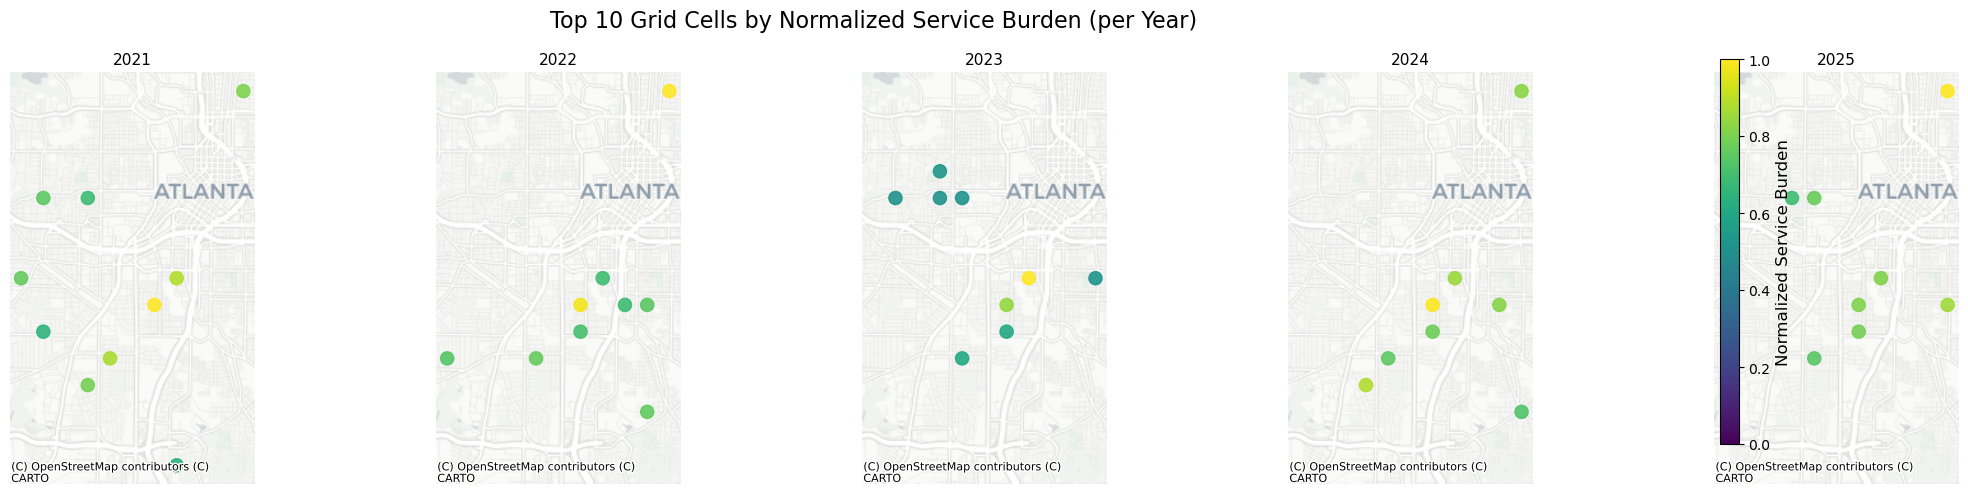

In [28]:
import matplotlib.pyplot as plt
import contextily as ctx

years = sorted(plot_df["year"].unique())

fig, axes = plt.subplots(1, len(years), figsize=(22, 5), sharex=True, sharey=True)

vmin = 0
vmax = 1   # because normalized

for ax, yr in zip(axes, years):
    top10 = (
        plot_df[plot_df["year"] == yr]
        .nlargest(10, "norm_service_burden")
    )

    top10.plot(
        ax=ax,
        column="norm_service_burden",
        markersize=90,
        cmap="viridis",
        vmin=vmin,
        vmax=vmax,
        alpha=0.9,
        legend=False
    )

    ctx.add_basemap(
        ax,
        source=ctx.providers.CartoDB.Positron,
        zoom=12
    )

    ax.set_title(f"{yr}", fontsize=11)
    ax.axis("off")

# 🔹 Add a shared colorbar
sm = plt.cm.ScalarMappable(
    cmap="viridis",
    norm=plt.Normalize(vmin=vmin, vmax=vmax)
)
sm._A = []  # required hack for matplotlib

cbar = fig.colorbar(
    sm,
    ax=axes,
    fraction=0.02,
    pad=0.01
)
cbar.set_label("Normalized Service Burden", fontsize=12)

plt.suptitle("Top 10 Grid Cells by Normalized Service Burden (per Year)", fontsize=16)
plt.tight_layout()
plt.show()


In [29]:
grid_overall = (
    gdf
    .groupby([pd.cut(gdf["x"], 50), pd.cut(gdf["y"], 50)])
    .agg(
        request_count=("response_score", "count"),
        mean_response_score=("response_score", "mean")
    )
    .reset_index()
)


C:\Users\shrey\AppData\Local\Temp\ipykernel_52828\449134184.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([pd.cut(gdf["x"], 50), pd.cut(gdf["y"], 50)])


In [30]:
grid_overall["x_mid"] = grid_overall.iloc[:, 0].apply(lambda b: b.mid)
grid_overall["y_mid"] = grid_overall.iloc[:, 1].apply(lambda b: b.mid)

grid_overall_gdf = gpd.GeoDataFrame(
    grid_overall,
    geometry=gpd.points_from_xy(
        grid_overall["x_mid"],
        grid_overall["y_mid"]
    ),
    crs="EPSG:3857"
)


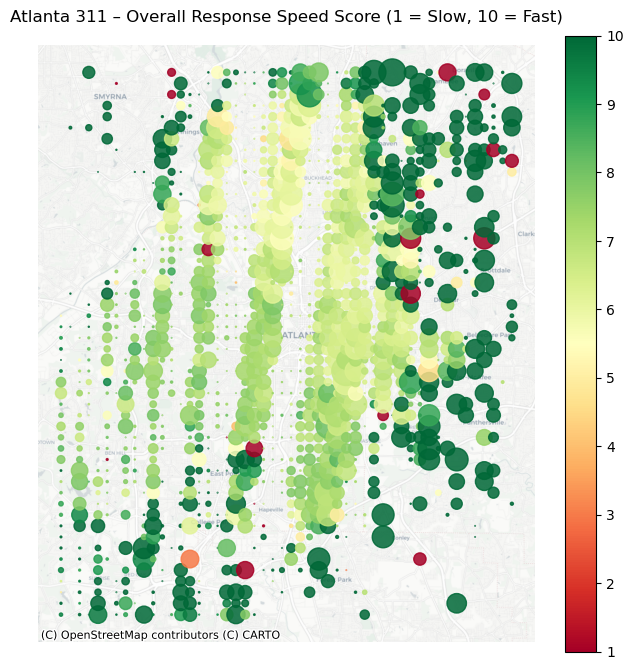

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))

grid_overall_gdf.plot(
    ax=ax,
    column="mean_response_score",
    cmap="RdYlGn",          # red = bad, green = good
    markersize=grid_overall_gdf["request_count"] / 5,
    alpha=0.85,
    vmin=1,
    vmax=10,
    legend=True
)

ctx.add_basemap(
    ax,
    source=ctx.providers.CartoDB.Positron,
    zoom=12
)

ax.set_title("Atlanta 311 – Overall Response Speed Score (1 = Slow, 10 = Fast)")
ax.axis("off")
plt.show()


In [32]:
grid_yearly = (
    gdf
    .groupby(
        ["year", pd.cut(gdf["x"], 50), pd.cut(gdf["y"], 50)],
        observed=True
    )
    .agg(
        request_count=("response_score", "count"),
        mean_response_score=("response_score", "mean")
    )
    .reset_index()
)


In [33]:
grid_yearly["x_mid"] = grid_yearly.iloc[:, 1].apply(lambda b: b.mid)
grid_yearly["y_mid"] = grid_yearly.iloc[:, 2].apply(lambda b: b.mid)

grid_yearly_gdf = gpd.GeoDataFrame(
    grid_yearly,
    geometry=gpd.points_from_xy(
        grid_yearly["x_mid"],
        grid_yearly["y_mid"]
    ),
    crs="EPSG:3857"
)


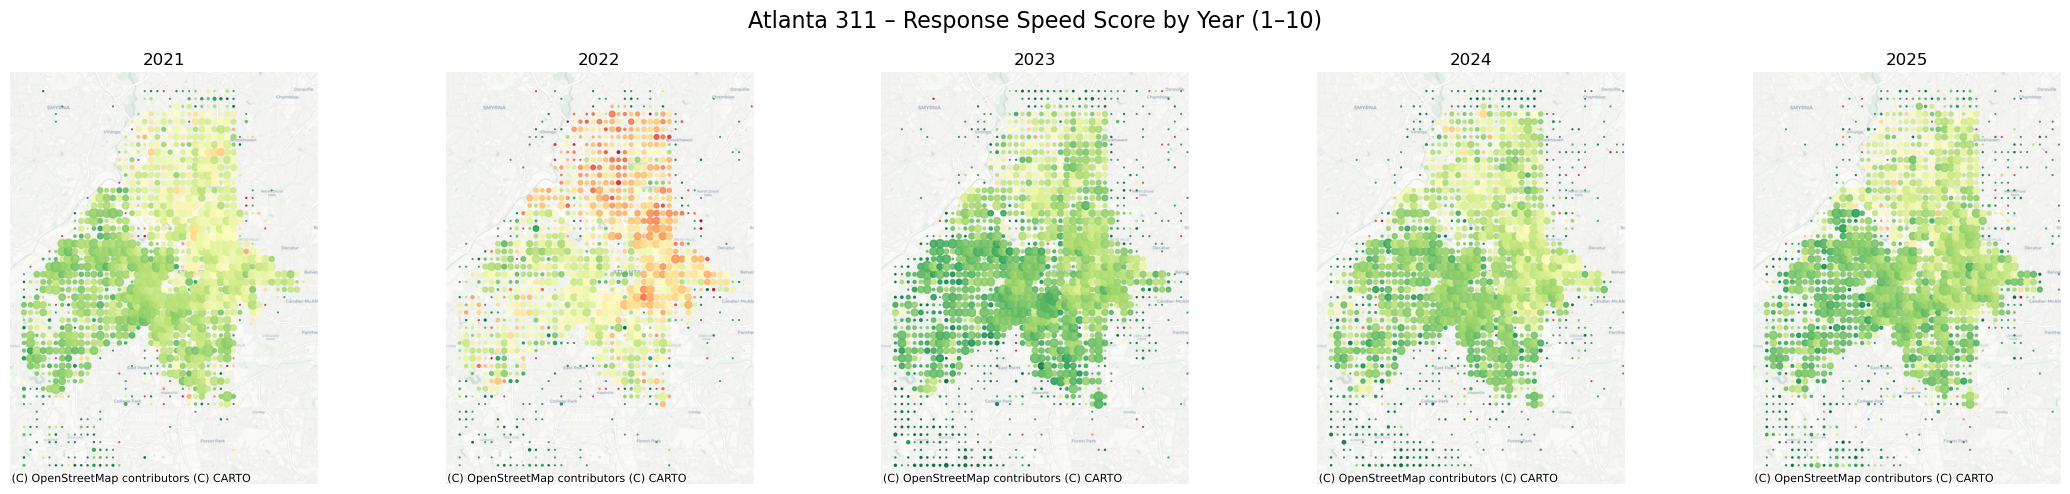

In [34]:
years = sorted(grid_yearly_gdf["year"].unique())

fig, axes = plt.subplots(1, len(years), figsize=(22, 5), sharex=True, sharey=True)

for ax, yr in zip(axes, years):
    df_yr = grid_yearly_gdf[grid_yearly_gdf["year"] == yr]

    df_yr.plot(
        ax=ax,
        column="mean_response_score",
        cmap="RdYlGn",
        markersize=df_yr["request_count"] / 5,
        vmin=1,
        vmax=10,
        alpha=0.85,
        legend=False
    )

    ctx.add_basemap(
        ax,
        source=ctx.providers.CartoDB.Positron,
        zoom=12
    )

    ax.set_title(str(yr))
    ax.axis("off")

plt.suptitle("Atlanta 311 – Response Speed Score by Year (1–10)", fontsize=16)
plt.tight_layout()
plt.show()


In [35]:
#### Composite score

In [38]:
print(grid_yearly_gdf.columns)

Index(['year', 'x', 'y', 'request_count', 'mean_response_score', 'x_mid',
       'y_mid', 'geometry', 'norm_service_burden'],
      dtype='object')


In [37]:
grid_yearly_gdf["norm_service_burden"] = (
    grid_yearly_gdf
    .groupby("year")["request_count"]
    .transform(lambda x: x / x.max())
)


In [39]:
grid_yearly_gdf.groupby("year")["norm_service_burden"].max()


year
2021    1.0
2022    1.0
2023    1.0
2024    1.0
2025    1.0
Name: norm_service_burden, dtype: float64

In [40]:
alpha = 0.6
beta = 0.4

grid_yearly_gdf["normalized_response_delay"] = (
    1 - grid_yearly_gdf["mean_response_score"] / 10
)

grid_yearly_gdf["composite_service_risk"] = (
    alpha * grid_yearly_gdf["norm_service_burden"] +
    beta  * grid_yearly_gdf["normalized_response_delay"]
)


In [41]:
grid_yearly_gdf["composite_service_risk"].describe()


count    6517.000000
mean        0.195689
std         0.134848
min         0.000881
25%         0.100729
50%         0.197066
75%         0.282559
max         0.833050
Name: composite_service_risk, dtype: float64

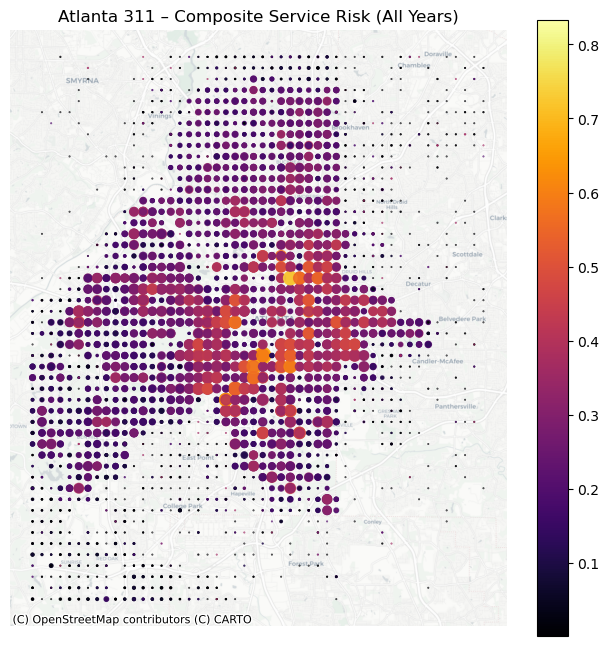

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))

grid_yearly_gdf.plot(
    ax=ax,
    column="composite_service_risk",
    cmap="inferno",               # dark = worse
    markersize=grid_yearly_gdf["request_count"] / 5,
    alpha=0.85,
    legend=True
)

ctx.add_basemap(
    ax,
    source=ctx.providers.CartoDB.Positron,
    zoom=12
)

ax.set_title("Atlanta 311 – Composite Service Risk (All Years)")
ax.axis("off")
plt.show()


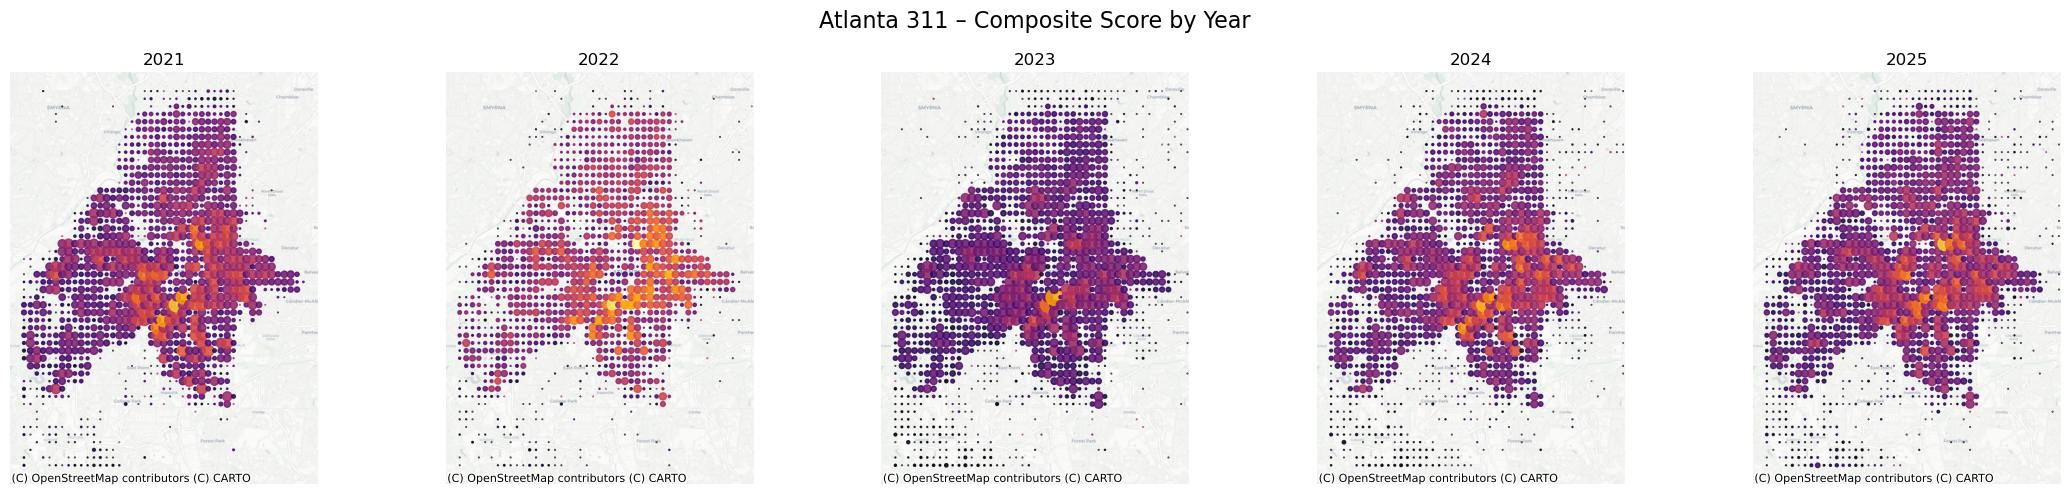

In [44]:
years = sorted(grid_yearly_gdf["year"].unique())

fig, axes = plt.subplots(
    1, len(years),
    figsize=(22, 5),
    sharex=True,
    sharey=True
)

vmin = grid_yearly_gdf["composite_service_risk"].min()
vmax = grid_yearly_gdf["composite_service_risk"].max()

for ax, yr in zip(axes, years):
    df_yr = grid_yearly_gdf[grid_yearly_gdf["year"] == yr]

    df_yr.plot(
        ax=ax,
        column="composite_service_risk",
        cmap="inferno",
        markersize=df_yr["request_count"] / 5,
        vmin=vmin,
        vmax=vmax,
        alpha=0.85,
        legend=False
    )

    ctx.add_basemap(
        ax,
        source=ctx.providers.CartoDB.Positron,
        zoom=12
    )

    ax.set_title(str(yr))
    ax.axis("off")

plt.suptitle("Atlanta 311 – Composite Score by Year", fontsize=16)
plt.tight_layout()
plt.show()


In [45]:
top10_risk = (
    grid_yearly_gdf
    .sort_values(["year", "composite_service_risk"], ascending=[True, False])
    .groupby("year")
    .head(10)
)

top10_risk[[
    "year",
    "x_mid",
    "y_mid",
    "request_count",
    "norm_service_burden",
    "mean_response_score",
    "composite_service_risk"
]]


year         x_mid         y_mid  request_count  norm_service_burden  \
683   2021 -9.395700e+06  3.992492e+06            516             1.000000   
602   2021 -9.397036e+06  3.990886e+06            451             0.874031   
724   2021 -9.395033e+06  3.993295e+06            456             0.883721   
857   2021 -9.393029e+06  3.998917e+06            416             0.806202   
563   2021 -9.397704e+06  3.990083e+06            409             0.792636   
497   2021 -9.399040e+06  3.995705e+06            388             0.751938   
461   2021 -9.399707e+06  3.993295e+06            394             0.763566   
817   2021 -9.393697e+06  4.000523e+06            302             0.585271   
570   2021 -9.397704e+06  3.995705e+06            356             0.689922   
717   2021 -9.395033e+06  3.987674e+06            334             0.647287   
2009  2022 -9.393029e+06  3.998917e+06            259             1.000000   
1841  2022 -9.395700e+06  3.992492e+06            254             0.980695   
2203  2022 -9.389690e+06  3.995705e+06            201             0.776062   
1960  2022 -9.393697e+06  3.992492e+06            193             0.745174   
1919  2022 -9.394365e+06  3.992492e+06            179             0.691120   
2002  2022 -9.393029e+06  3.993295e+06            179             0.691120   
1764  2022 -9.397036e+06  3.990886e+06            199             0.768340   
2085  2022 -9.391693e+06  3.996508e+06            173             0.667954   
2233  2022 -9.389022e+06  3.997311e+06            158             0.610039   
2130  2022 -9.391026e+06  3.998917e+06            171             0.660232   
3164  2023 -9.395033e+06  3.993295e+06            681             1.000000   
3121  2023 -9.395700e+06  3.992492e+06            573             0.841410   
3037  2023 -9.397036e+06  3.990886e+06            411             0.603524   
3120  2023 -9.395700e+06  3.991689e+06            412             0.604993   
3290  2023 -9.393029e+06  3.993295e+06            353             0.518355   
3297  2023 -9.393029e+06  3.998917e+06            345             0.506608   
3339  2023 -9.392361e+06  3.998917e+06            354             0.519824   
2929  2023 -9.399040e+06  3.995705e+06            351             0.515419   
3003  2023 -9.397704e+06  3.996508e+06            359             0.527166   
3249  2023 -9.393697e+06  3.994099e+06            325             0.477239   
4521  2024 -9.395700e+06  3.992492e+06            471             1.000000   
4702  2024 -9.393029e+06  3.998917e+06            390             0.828025   
4392  2024 -9.397704e+06  3.990083e+06            414             0.878981   
4565  2024 -9.395033e+06  3.993295e+06            401             0.851380   
4651  2024 -9.393697e+06  3.992492e+06            386             0.819533   
4743  2024 -9.392361e+06  3.998917e+06            350             0.743100   
4784  2024 -9.391693e+06  3.996508e+06            323             0.685775   
4788  2024 -9.391693e+06  3.999720e+06            305             0.647558   
4520  2024 -9.395700e+06  3.991689e+06            367             0.779193   
4435  2024 -9.397036e+06  3.990886e+06            355             0.753715   
6081  2025 -9.393029e+06  3.998917e+06            469             1.000000   
6073  2025 -9.393029e+06  3.992492e+06            402             0.857143   
5946  2025 -9.395033e+06  3.993295e+06            380             0.810235   
5825  2025 -9.397036e+06  3.995705e+06            361             0.769723   
5902  2025 -9.395700e+06  3.992492e+06            378             0.805970   
5901  2025 -9.395700e+06  3.991689e+06            371             0.791045   
6124  2025 -9.392361e+06  3.998917e+06            358             0.763326   
6209  2025 -9.391026e+06  3.998917e+06            335             0.714286   
6074  2025 -9.393029e+06  3.993295e+06            323             0.688699   
5819  2025 -9.397036e+06  3.990886e+06            348             0.742004   

      mean_response_score  

C:\Users\shrey\AppData\Local\Temp\ipykernel_52828\335319931.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


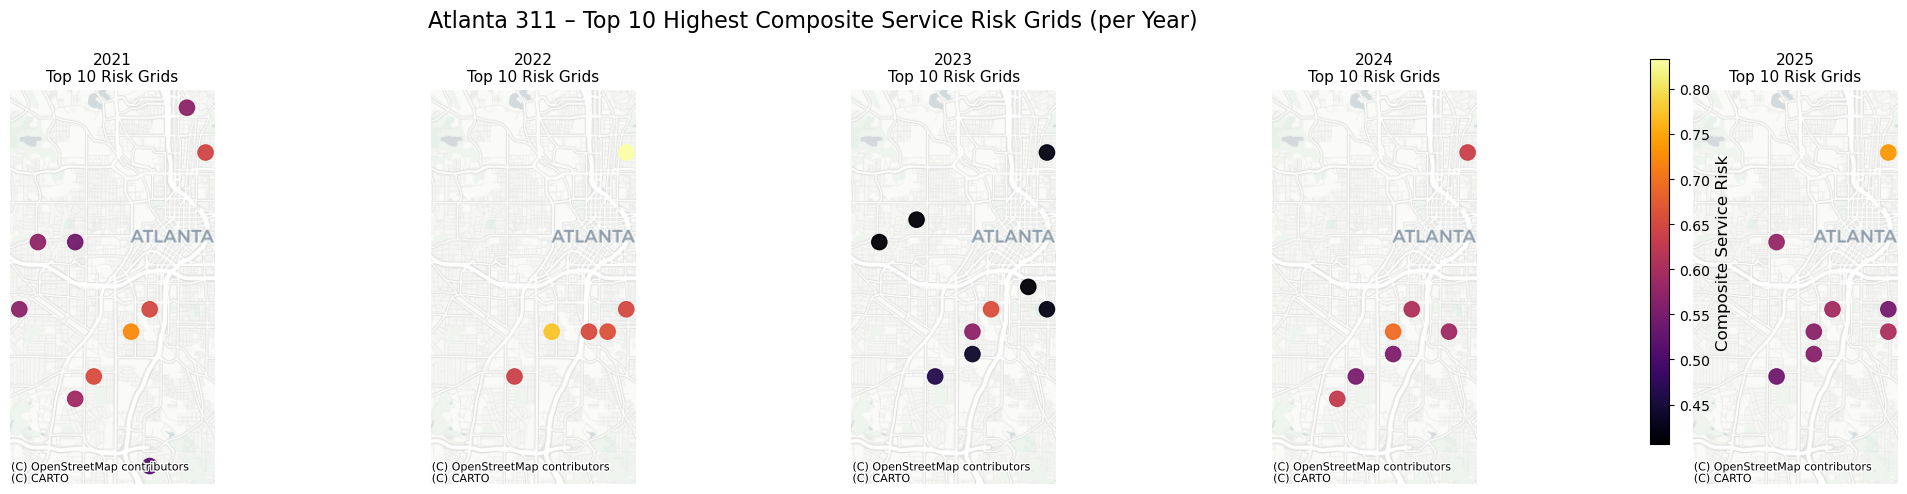

In [46]:
import matplotlib.pyplot as plt
import contextily as ctx

years = sorted(top10_risk["year"].unique())

fig, axes = plt.subplots(
    1, len(years),
    figsize=(22, 5),
    sharex=True,
    sharey=True
)

# Keep color scale consistent across years
vmin = top10_risk["composite_service_risk"].min()
vmax = top10_risk["composite_service_risk"].max()

for ax, yr in zip(axes, years):
    df_yr = top10_risk[top10_risk["year"] == yr]

    df_yr.plot(
        ax=ax,
        column="composite_service_risk",
        cmap="inferno",          # dark → low, bright → high risk
        markersize=120,          # fixed size = fast & readable
        vmin=vmin,
        vmax=vmax,
        alpha=0.95,
        legend=False
    )

    ctx.add_basemap(
        ax,
        source=ctx.providers.CartoDB.Positron,
        zoom=12
    )

    ax.set_title(f"{yr}\nTop 10 Risk Grids", fontsize=11)
    ax.axis("off")

# ---- Shared colorbar ----
sm = plt.cm.ScalarMappable(
    cmap="inferno",
    norm=plt.Normalize(vmin=vmin, vmax=vmax)
)
sm._A = []

cbar = fig.colorbar(
    sm,
    ax=axes,
    fraction=0.025,
    pad=0.01
)
cbar.set_label("Composite Service Risk", fontsize=12)

plt.suptitle(
    "Atlanta 311 – Top 10 Highest Composite Service Risk Grids (per Year)",
    fontsize=16
)
plt.tight_layout()
plt.show()
